In [3]:


import pandas as pd
import os

# Get all files from the /merged directory training data 
merged_dir = 'traindata'
all_files = []

# Walk through the directory to find all files
for root, dirs, files in os.walk(merged_dir):
    for file in files:
        if file.endswith(('.csv', '.parquet', '.json', '.xlsx')):  # Add other file types as needed
            all_files.append(os.path.join(root, file))

# Load and concatenate all files into a single dataframe
dfs = []
for file_path in all_files:
    try:
        if file_path.endswith('.csv'):
            temp_df = pd.read_csv(file_path)
            if len(dfs) >= 30:  # Only load first 15 files
                break
       
        
        dfs.append(temp_df)
        print(f"Loaded: {file_path}")
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Concatenate all dataframes
if dfs:
    train = pd.concat(dfs, ignore_index=True)
    print(f"Successfully loaded {len(dfs)} files into dataframe")
else:
    print("No files found or loaded")

Loaded: traindata/merged_2013-11-19.csv
Loaded: traindata/merged_2013-12-06.csv
Loaded: traindata/merged_2013-11-18.csv
Loaded: traindata/merged_2013-11-22.csv
Loaded: traindata/merged_2013-12-02.csv
Loaded: traindata/merged_2013-11-10.csv
Loaded: traindata/merged_2013-11-03.csv
Loaded: traindata/merged_2013-11-21.csv
Loaded: traindata/merged_2013-11-07.csv
Loaded: traindata/merged_2013-12-13.csv
Loaded: traindata/merged_2013-11-12.csv
Loaded: traindata/merged_2013-11-02.csv
Loaded: traindata/merged_2013-11-09.csv
Loaded: traindata/merged_2013-11-01.csv
Loaded: traindata/merged_2013-11-05.csv
Loaded: traindata/merged_2013-11-13.csv
Loaded: traindata/merged_2013-11-15.csv
Loaded: traindata/merged_2013-12-12.csv
Loaded: traindata/merged_2013-11-29.csv
Loaded: traindata/merged_2013-11-26.csv
Loaded: traindata/merged_2013-12-05.csv
Loaded: traindata/merged_2013-11-24.csv
Loaded: traindata/merged_2013-12-08.csv
Loaded: traindata/merged_2013-11-14.csv
Loaded: traindata/merged_2013-12-03.csv


In [4]:
print(train.head)

<bound method NDFrame.head of          Milan_Grid_Square_ID      Time Interval (GMT+1)  \
0                        2526  2013-11-19 00:00:00+01:00   
1                        2526  2013-11-19 00:10:00+01:00   
2                        2526  2013-11-19 00:20:00+01:00   
3                        2526  2013-11-19 00:30:00+01:00   
4                        2526  2013-11-19 00:40:00+01:00   
...                       ...                        ...   
9942089                  7475  2013-11-11 23:10:00+01:00   
9942090                  7475  2013-11-11 23:20:00+01:00   
9942091                  7475  2013-11-11 23:30:00+01:00   
9942092                  7475  2013-11-11 23:40:00+01:00   
9942093                  7475  2013-11-11 23:50:00+01:00   

         Internet traffic activity  SMS activity  Call activity  is_day_off  \
0                         7.569519      0.192982       0.129232           0   
1                         7.468271      1.109266       0.345474           0   
2           

In [5]:

# Convert Time Interval column to datetime first
train['Time Interval (GMT+1)'] = pd.to_datetime(train['Time Interval (GMT+1)'])

# Split the Time Interval column into separate date and time components
train['Date'] = train['Time Interval (GMT+1)'].dt.date
train['Time_Numeric'] = train['Time Interval (GMT+1)'].dt.hour + train['Time Interval (GMT+1)'].dt.minute/60

print("Time interval split completed!")
print(f"Date column sample: {train['Date'].head()}")
print(f"Time_Numeric column sample: {train['Time_Numeric'].head()}")
print(f"Data types - Date: {train['Date'].dtype}, Time_Numeric: {train['Time_Numeric'].dtype}")

Time interval split completed!
Date column sample: 0    2013-11-19
1    2013-11-19
2    2013-11-19
3    2013-11-19
4    2013-11-19
Name: Date, dtype: object
Time_Numeric column sample: 0    0.000000
1    0.166667
2    0.333333
3    0.500000
4    0.666667
Name: Time_Numeric, dtype: float64
Data types - Date: object, Time_Numeric: float64


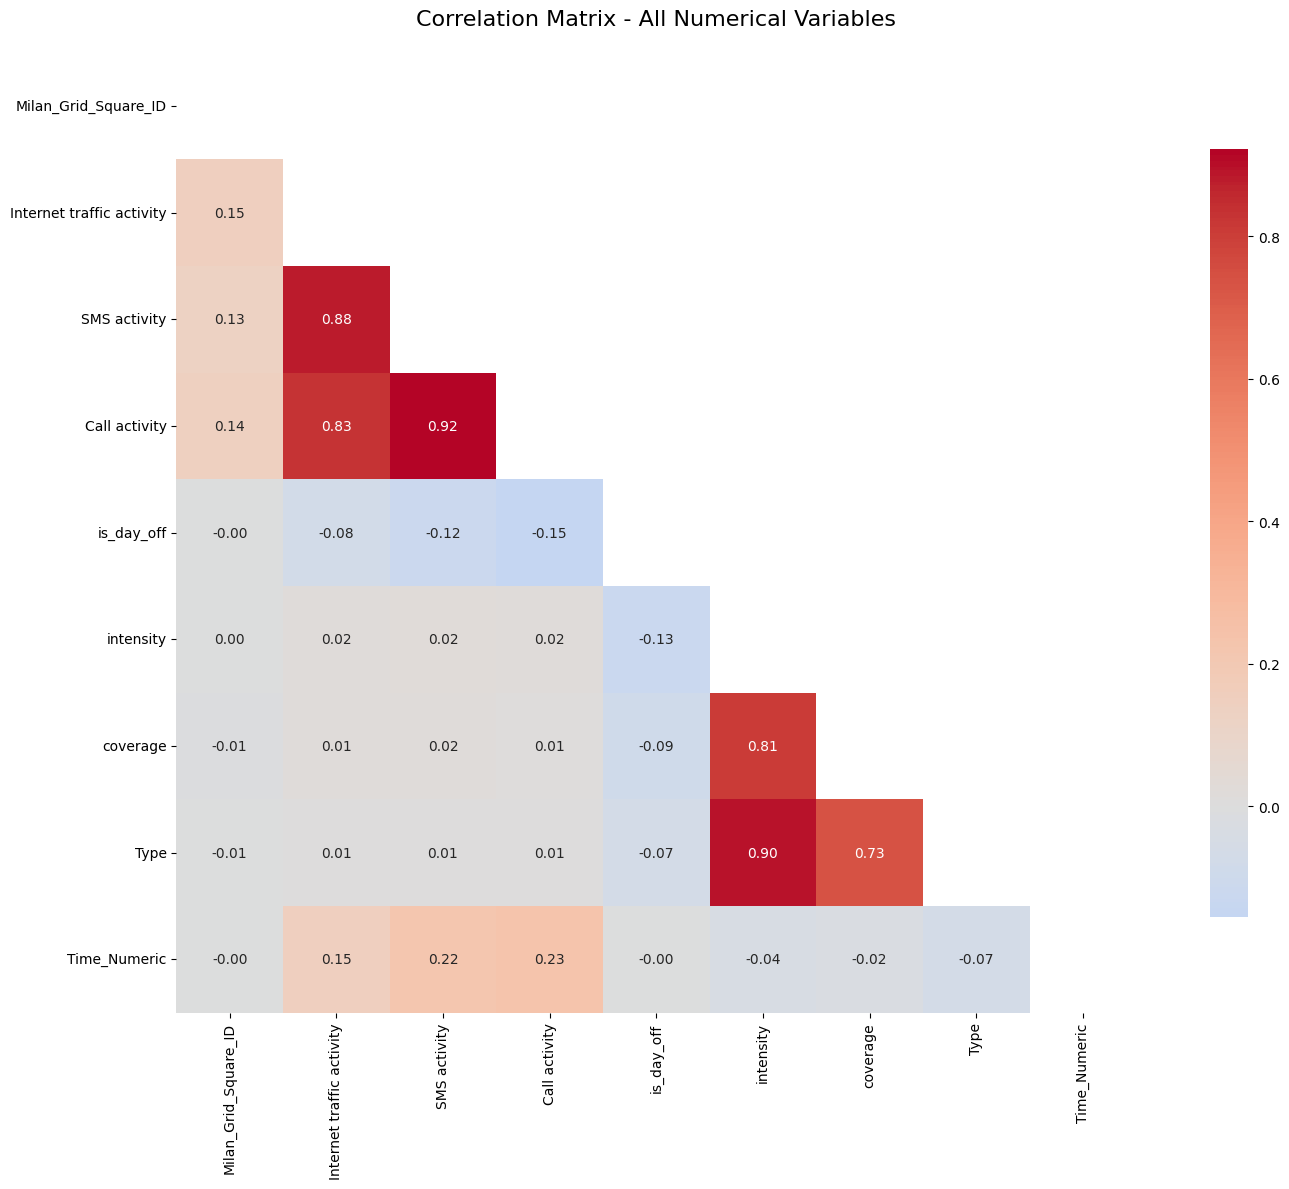

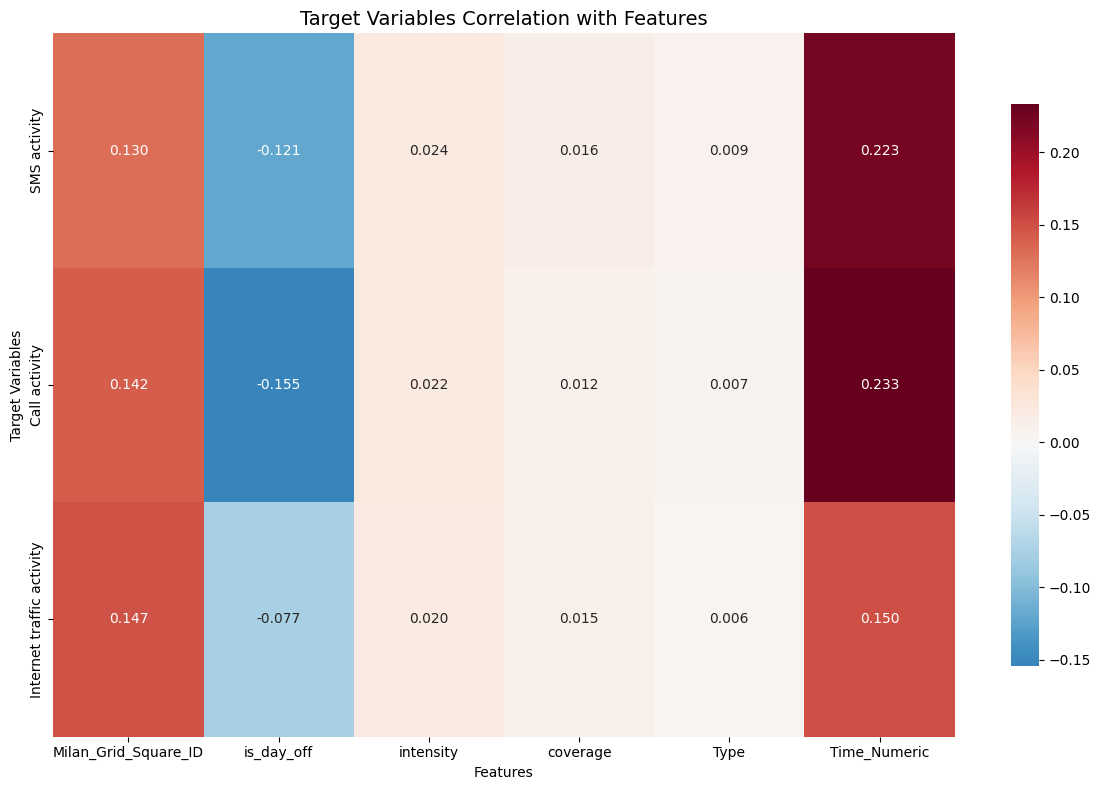

Correlation matrix created successfully!
Matrix shape: (9, 9)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns that exist in the dataframe
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()

# Create correlation matrix for all numerical variables
correlation_matrix = train[numerical_cols].corr()
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - All Numerical Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Define target variables
target_vars = ['SMS activity', 'Call activity', 'Internet traffic activity']

# Focus on target variables correlation with other features
target_correlation = correlation_matrix[target_vars].drop(target_vars, axis=0)
plt.figure(figsize=(12, 8))
sns.heatmap(target_correlation.T, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.3f',
            cbar_kws={"shrink": .8})
plt.title('Target Variables Correlation with Features', fontsize=14)
plt.ylabel('Target Variables')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

print("Correlation matrix created successfully!")
print(f"Matrix shape: {correlation_matrix.shape}")


1. Creating temporal features...
2. Engineering Grid Square features...
3. Transforming target variables...
SMS activity skewness: 4.937
Call activity skewness: 4.340
Internet traffic activity skewness: 4.082
4. Creating interaction features...
5. Preparing final feature set...
Final feature set: 20 features
Features: ['Milan_Grid_Square_ID', 'Time_Numeric', 'is_day_off', 'hour_sin', 'hour_cos', 'grid_density', 'grid_x', 'grid_y', 'time_dayoff_interaction', 'grid_time_interaction', 'day_sin', 'day_cos', 'is_weekend', 'time_Night', 'time_Morning', 'time_Afternoon', 'time_Evening', 'grid_avg_sms', 'grid_avg_call', 'grid_avg_internet']


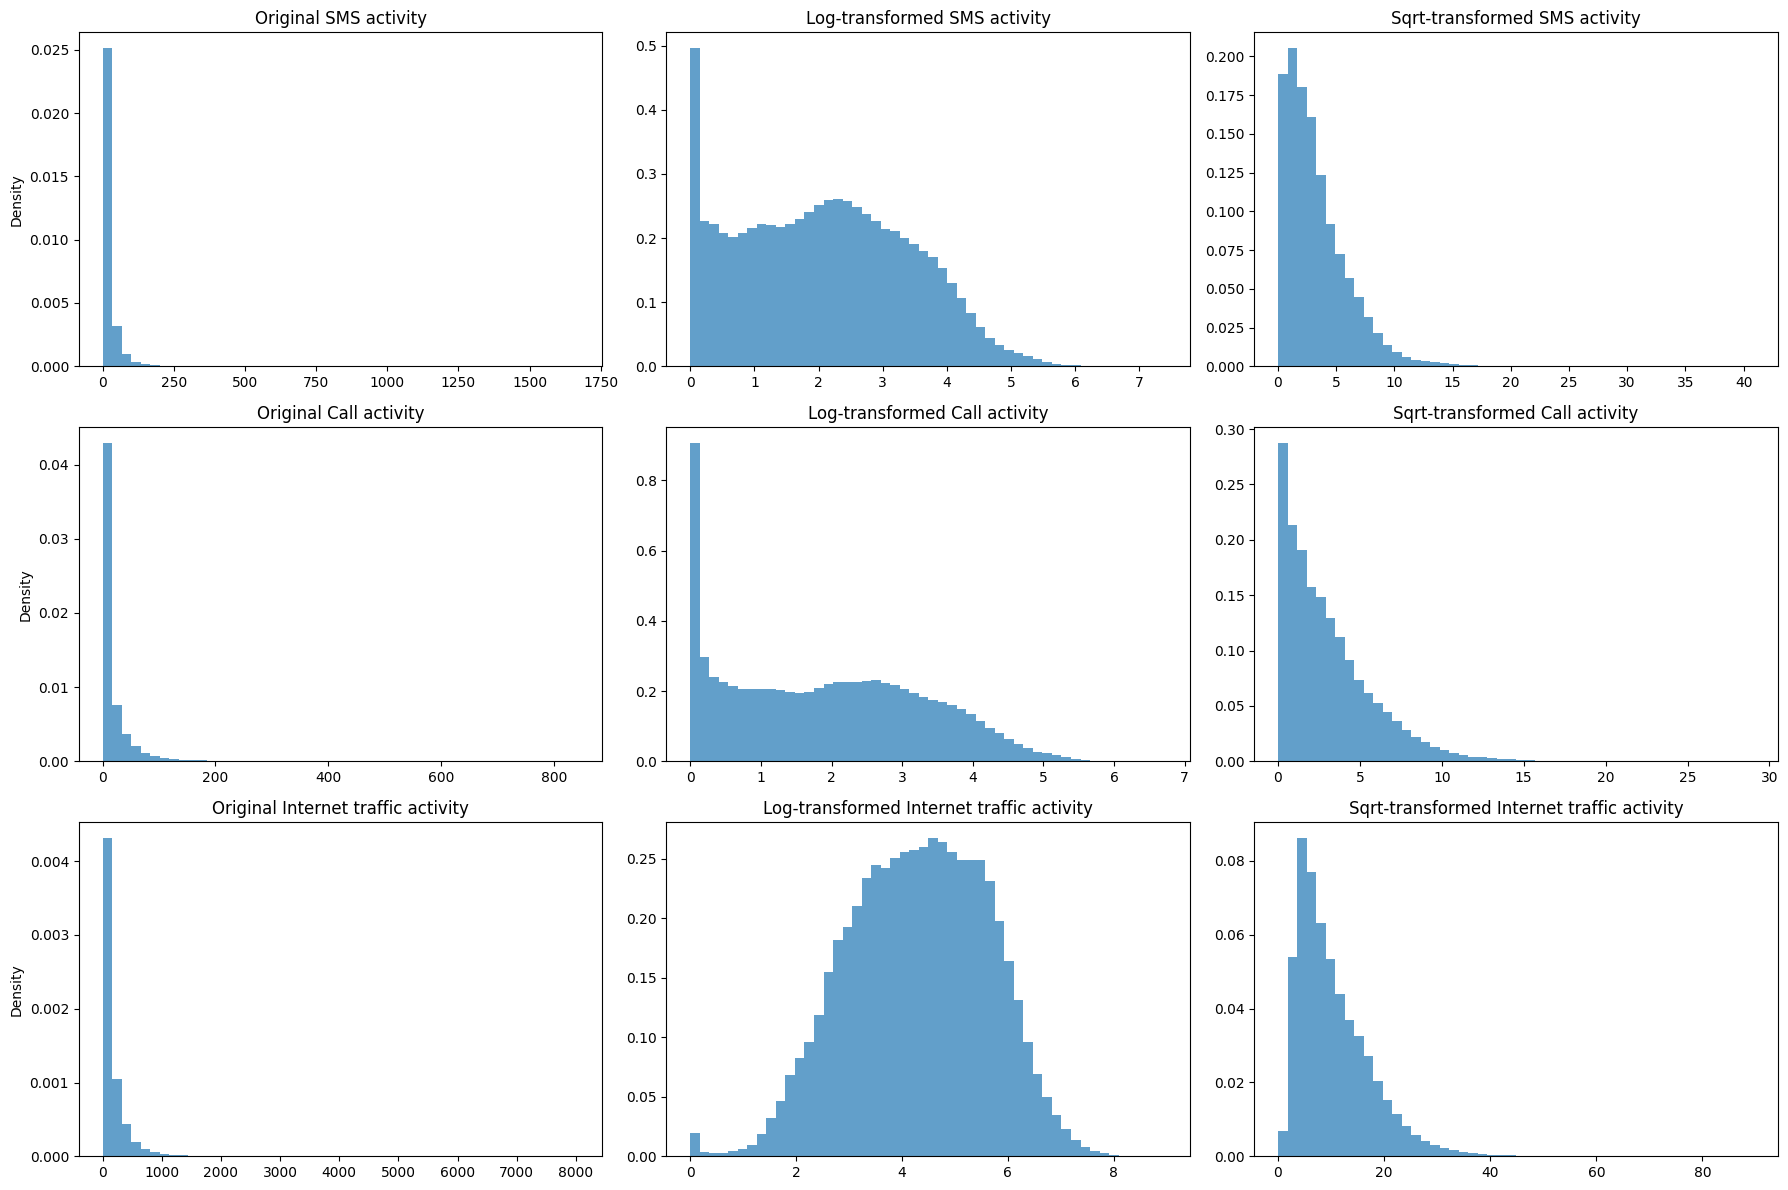

In [7]:
# Comprehensive Data Transformation Pipeline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns

def comprehensive_data_transformation(df):
    """
    Apply comprehensive transformations to improve model performance
    """
    data = df.copy()
    
    # 1. TEMPORAL FEATURE ENGINEERING
    print("1. Creating temporal features...")
    
    # Convert time to cyclical features (important for time patterns)
    data['hour_sin'] = np.sin(2 * np.pi * data['Time_Numeric'] / 24)
    data['hour_cos'] = np.cos(2 * np.pi * data['Time_Numeric'] / 24)
    
    # Create time-based bins
    data['time_period'] = pd.cut(data['Time_Numeric'], 
                               bins=[0, 6, 12, 18, 24], 
                               labels=['Night', 'Morning', 'Afternoon', 'Evening'])
    
    # Day of week features (if date available)
    if 'Date' in data.columns:
        data['Date'] = pd.to_datetime(data['Date'])
        data['day_of_week'] = data['Date'].dt.dayofweek
        data['is_weekend'] = (data['day_of_week'] >= 5).astype(int)
        data['day_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
        data['day_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)
    
    # 2. GRID SQUARE FEATURE ENGINEERING
    print("2. Engineering Grid Square features...")
    
    # Instead of one-hot encoding, create meaningful features from Grid ID
    # Grid density features
    grid_counts = data['Milan_Grid_Square_ID'].value_counts()
    data['grid_density'] = data['Milan_Grid_Square_ID'].map(grid_counts)
    
    # Grid-based aggregated features (mean activity by grid)
    for target in ['SMS activity', 'Call activity', 'Internet traffic activity']:
        grid_mean = data.groupby('Milan_Grid_Square_ID')[target].mean()
        data[f'grid_avg_{target.split()[0].lower()}'] = data['Milan_Grid_Square_ID'].map(grid_mean)
    
    # Grid coordinates (if grid follows spatial pattern)
    # Assuming grid IDs have spatial meaning - extract coordinates
    data['grid_x'] = data['Milan_Grid_Square_ID'] % 100  # Extract x coordinate
    data['grid_y'] = data['Milan_Grid_Square_ID'] // 100  # Extract y coordinate
    
    # 3. TARGET VARIABLE TRANSFORMATIONS
    print("3. Transforming target variables...")
    
    target_vars = ['SMS activity', 'Call activity', 'Internet traffic activity']
    transformed_targets = {}
    
    for target in target_vars:
        # Check distribution and apply appropriate transformation
        skewness = data[target].skew()
        print(f"{target} skewness: {skewness:.3f}")
        
        if abs(skewness) > 1:  # Highly skewed
            # Try log transformation (add 1 to handle zeros)
            data[f'{target}_log'] = np.log1p(data[target])
            
            # Try Box-Cox transformation
            pt = PowerTransformer(method='box-cox', standardize=False)
            # Box-Cox requires positive values
            if data[target].min() > 0:
                data[f'{target}_boxcox'] = pt.fit_transform(data[[target]]).flatten()
            
            # Try sqrt transformation
            data[f'{target}_sqrt'] = np.sqrt(data[target])
            
            transformed_targets[target] = f'{target}_log'  # Use log as default
        else:
            transformed_targets[target] = target  # No transformation needed
    
    # 4. INTERACTION FEATURES
    print("4. Creating interaction features...")
    
    # Time-based interactions
    data['time_dayoff_interaction'] = data['Time_Numeric'] * data['is_day_off']
    data['grid_time_interaction'] = data['grid_density'] * data['Time_Numeric']
    
    # Activity correlations (targets are highly correlated)
    data['sms_call_ratio'] = data['SMS activity'] / (data['Call activity'] + 1)
    data['internet_total_ratio'] = data['Internet traffic activity'] / (
        data['SMS activity'] + data['Call activity'] + data['Internet traffic activity'] + 1)
    
    # 5. FEATURE SCALING AND SELECTION
    print("5. Preparing final feature set...")
    
    # Select features for modeling
    feature_cols = [
        # Original features
        'Milan_Grid_Square_ID', 'Time_Numeric', 'is_day_off',
        
        # Temporal features
        'hour_sin', 'hour_cos',
        
        # Grid features
        'grid_density', 'grid_x', 'grid_y',
        
        # Interaction features
        'time_dayoff_interaction', 'grid_time_interaction',
        
    ]
    
    # Add day features if available
    if 'day_sin' in data.columns:
        feature_cols.extend(['day_sin', 'day_cos', 'is_weekend'])
    
    # Add time period dummies
    if 'time_period' in data.columns:
        time_dummies = pd.get_dummies(data['time_period'], prefix='time')
        data = pd.concat([data, time_dummies], axis=1)
        feature_cols.extend(time_dummies.columns)
    
    # Add grid average features
    grid_avg_cols = [col for col in data.columns if col.startswith('grid_avg_')]
    feature_cols.extend(grid_avg_cols)
    
    # Remove any columns that don't exist
    feature_cols = [col for col in feature_cols if col in data.columns]
    
    print(f"Final feature set: {len(feature_cols)} features")
    print(f"Features: {feature_cols}")
    
    return data, feature_cols, transformed_targets

# Apply transformations
transformed_data, final_features, target_transformations = comprehensive_data_transformation(train)

# Visualize transformation effects
def plot_transformation_effects(original_data, transformed_data, target_vars):
    """Plot before/after distributions"""
    
    fig, axes = plt.subplots(len(target_vars), 3, figsize=(18, 12))
    
    for i, target in enumerate(target_vars):
        # Original distribution
        axes[i, 0].hist(original_data[target], bins=50, alpha=0.7, density=True)
        axes[i, 0].set_title(f'Original {target}')
        axes[i, 0].set_ylabel('Density')
        
        # Log transformed
        if f'{target}_log' in transformed_data.columns:
            axes[i, 1].hist(transformed_data[f'{target}_log'], bins=50, alpha=0.7, density=True)
            axes[i, 1].set_title(f'Log-transformed {target}')
        
        # Box-Cox transformed (if available)
        if f'{target}_boxcox' in transformed_data.columns:
            axes[i, 2].hist(transformed_data[f'{target}_boxcox'], bins=50, alpha=0.7, density=True)
            axes[i, 2].set_title(f'Box-Cox {target}')
        else:
            axes[i, 2].hist(transformed_data[f'{target}_sqrt'], bins=50, alpha=0.7, density=True)
            axes[i, 2].set_title(f'Sqrt-transformed {target}')
    
    plt.tight_layout()
    plt.show()

# Visualize transformations
plot_transformation_effects(train, transformed_data, target_vars)


In [9]:
%load_ext cuml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from cuml.neighbors import KNeighborsRegressor
import cupy as cp

# Use pandas DataFrames for features and targets
X = transformed_data[final_features]
y = transformed_data[list(target_transformations.values())]

# Split data using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using sklearn StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data to CuPy arrays for CuML KNN
X_train_cupy = cp.asarray(X_train_scaled)
X_test_cupy = cp.asarray(X_test_scaled)
y_train_cupy = cp.asarray(y_train.values)
y_test_cupy = cp.asarray(y_test.values)

# Define and train the KNN model with CuML
knn_clf = KNeighborsRegressor(n_neighbors=5) 
knn_clf.fit(X_train_cupy, y_train_cupy)

# Predict and evaluate
y_pred_knn = knn_clf.predict(X_test_cupy)

# Convert predictions back to CPU for evaluation
y_pred_knn_cpu = cp.asnumpy(y_pred_knn)

# Calculate metrics using sklearn
mse_knn = mean_squared_error(y_test, y_pred_knn_cpu)
r2_knn = r2_score(y_test, y_pred_knn_cpu)
print(f"KNN Test MSE (overall): {mse_knn:.4f}")
print(f"KNN Test R2 Score (overall): {r2_knn:.4f}")

# Separate scoring for each target variable
target_names = ['SMS activity_log', 'Call activity_log', 'Internet traffic activity_log']
print("\n--- Individual Target Variable Performance ---")
for i, target_name in enumerate(target_names):
    mse_individual = mean_squared_error(y_test.iloc[:, i], y_pred_knn_cpu[:, i])
    r2_individual = r2_score(y_test.iloc[:, i], y_pred_knn_cpu[:, i])
    print(f"{target_name}:")
    print(f"  MSE: {mse_individual:.4f}")
    print(f"  R2 Score: {r2_individual:.4f}")

# Store the best model for later use
best_knn_model = knn_clf


The cuml module is not an IPython extension.
KNN Test MSE (overall): 0.1402
KNN Test R2 Score (overall): 0.9213

--- Individual Target Variable Performance ---
SMS activity_log:
  MSE: 0.1737
  R2 Score: 0.9010
Call activity_log:
  MSE: 0.0841
  R2 Score: 0.9565
Internet traffic activity_log:
  MSE: 0.1630
  R2 Score: 0.9065


In [ ]:


# Load test data and evaluate the model

# Get all files from the test directory
test_dir = 'testdata'
test_files = []

# Walk through the directory to find all files
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(('.csv', '.parquet', '.json', '.xlsx')):
            test_files.append(os.path.join(root, file))

# Load and concatenate all test files
test_dfs = []
for file_path in test_files:
    try:
        if file_path.endswith('.csv'):
            temp_test_df = pd.read_csv(file_path)
        test_dfs.append(temp_test_df)
        print(f"Loaded test file: {file_path}")
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Concatenate all test dataframes
if test_dfs:
    test_data = pd.concat(test_dfs, ignore_index=True)
    print(f"Successfully loaded {len(test_dfs)} test files into dataframe")
    
    # Apply the same transformations to test data
    # Convert Time Interval column to datetime first
    test_data['Time Interval (GMT+1)'] = pd.to_datetime(test_data['Time Interval (GMT+1)'])

    # Split the Time Interval column into separate date and time components
    test_data['Date'] = test_data['Time Interval (GMT+1)'].dt.date
    test_data['Time_Numeric'] = test_data['Time Interval (GMT+1)'].dt.hour + test_data['Time Interval (GMT+1)'].dt.minute/60

    print("Time interval split completed!")
    print(f"Date column sample: {train['Date'].head()}")
    print(f"Time_Numeric column sample: {train['Time_Numeric'].head()}")
    print(f"Data types - Date: {train['Date'].dtype}, Time_Numeric: {train['Time_Numeric'].dtype}")


    test_transformed, _, _ = comprehensive_data_transformation(test_data)
    
    # Prepare test features
    X_test_final = test_transformed[final_features]
    X_test_final_scaled = scaler.transform(X_test_final)
    
    # Make predictions on test data
    test_predictions = best_knn_model.predict(X_test_final_scaled)
    
    print(f"Test data shape: {test_data.shape}")
    print(f"Test predictions shape: {test_predictions.shape}")
    
    # If test data has target variables, evaluate performance
    if all(col in test_data.columns for col in target_vars):
        # Transform test targets the same way
        y_test_final = test_transformed[list(target_transformations.values())]
        
        # Calculate test performance
        test_mse = mean_squared_error(y_test_final, test_predictions)
        test_r2 = r2_score(y_test_final, test_predictions)
        
        print(f"\nFinal Test Performance:")
        print(f"Test MSE: {test_mse:.4f}")
        print(f"Test R2 Score: {test_r2:.4f}")
        
        # Individual target performance
        for i, target_name in enumerate(target_names):
            test_mse_individual = mean_squared_error(y_test_final.iloc[:, i], test_predictions[:, i])
            test_r2_individual = r2_score(y_test_final.iloc[:, i], test_predictions[:, i])
            print(f"{target_name} - MSE: {test_mse_individual:.4f}, R2: {test_r2_individual:.4f}")
    
else:
    print("No test files found")